# Airbnb Berlin Price Prediction 
---


### *Table of Contents*
- [Exploratory Data Analysis](#eda)
- [Preprocessing](#preprocessing)
- [Modeling](#modeling)

In [406]:
import pandas as pd
import numpy as np

#
import matplotlib.pyplot as plt

#
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

import os

### Import data

In [407]:
data_dir = "data"

In [408]:
trainset = pd.read_csv('data/train_airbnb_berlin.csv')
print(trainset.shape)

(15692, 39)


In [409]:
X_test = pd.read_csv('data/test_airbnb_berlin.csv')
print(X_test.shape)

(7842, 38)


### Extracting the room features

In [410]:
trainset.columns

Index(['Listing ID', 'Listing Name', 'Host ID', 'Host Name', 'Host Since',
       'Host Response Time', 'Host Response Rate', 'Is Superhost',
       'neighbourhood', 'Neighborhood Group', 'City', 'Postal Code',
       'Country Code', 'Country', 'Latitude', 'Longitude', 'Is Exact Location',
       'Property Type', 'Room Type', 'Accomodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Square Feet', 'Guests Included', 'Min Nights', 'Reviews',
       'First Review', 'Last Review', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Instant Bookable',
       'Business Travel Ready', 'Price'],
      dtype='object')

In [411]:
#Extraction de mes 7 features a analyser + prix
rooms = trainset[["Room Type", "Accomodates", "Bathrooms", "Bedrooms", "Beds", "Guests Included", "Min Nights", "Price"]]
print(rooms.shape)

(15692, 8)


In [412]:
rooms.head()

,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights,Price
0,Private room,2,1.0,1.0,1.0,1,2,26.0
1,Entire home/apt,2,1.0,2.0,2.0,2,7,41.0
2,Entire home/apt,3,1.0,1.0,2.0,1,1,50.0
3,Private room,2,1.0,1.0,1.0,1,2,50.0
4,Private room,3,1.0,1.0,2.0,1,6,55.0


In [413]:
rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15692 entries, 0 to 15691
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Room Type        15692 non-null  object 
 1   Accomodates      15692 non-null  object 
 2   Bathrooms        15678 non-null  object 
 3   Bedrooms         15687 non-null  object 
 4   Beds             15684 non-null  object 
 5   Guests Included  15692 non-null  object 
 6   Min Nights       15692 non-null  object 
 7   Price            15683 non-null  float64
dtypes: float64(1), object(7)
memory usage: 980.9+ KB


### Handling missing values

In [414]:
#Valeurs manquantes
rooms_na = rooms.isna().sum()
print(rooms_na[rooms_na.values > 0].sort_values(ascending=False))
print("Total :", rooms_na.sum())

Bathrooms    14
Price         9
Beds          8
Bedrooms      5
dtype: int64
Total : 36


In [415]:
#Valeurs étoiles
cpt=0
sum = 0
carac_spec=[];

for col in rooms:
    for el in rooms[col].values:
        if el == '*':
            cpt+=1
            carac_spec.append(el)
    if cpt != 0:
        print(col, ":" ,cpt)
    sum += cpt
    cpt = 0
print("Total :", sum)

Accomodates : 19
Bathrooms : 11
Bedrooms : 11
Beds : 12
Guests Included : 10
Min Nights : 249
Total : 312


Regarder correlation avec et sans

Pas d'étoile dans la colonne prix.
Il pourrait s'agir d'un indicateur servant à préciser que l'info pour une feature donnée n'est pas présente sur le site

In [416]:
## Stockage tableau avec étoiles
etoiles = rooms.copy()
#Remplacement étoiles
rooms=rooms.replace('*', np.nan);
#Drop missing values
rooms=rooms.dropna();

### Type Conversion

In [417]:
#Conversion en flottants
rooms[[ "Accomodates", "Bathrooms", "Bedrooms", "Beds", "Guests Included", "Min Nights"]] = rooms[["Accomodates", "Bathrooms", "Bedrooms", "Beds", "Guests Included", "Min Nights"]].astype(float)

### Number of rooms

#### Bedrooms

In [418]:
avg_price_bed=rooms.groupby('Bedrooms')["Price"].mean()
print(avg_price_bed)

Bedrooms
0.0     58.350846
1.0     50.039869
2.0     94.427880
3.0    141.341151
4.0    168.666667
5.0    204.777778
Name: Price, dtype: float64


1.0    11613
2.0     2066
0.0     1123
3.0      469
4.0       75
5.0       18
Name: Bedrooms, dtype: int64


Text(0.5, 0, 'Number of bedrooms and average price')

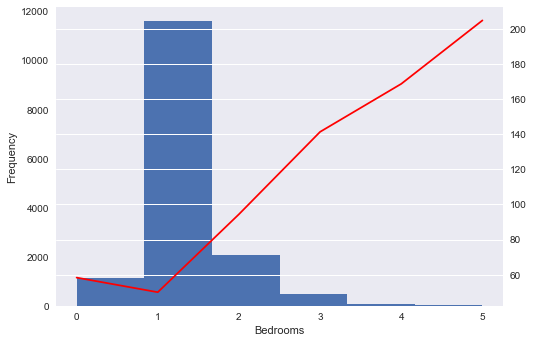

In [419]:
fig, ax = plt.subplots()
print(rooms["Bedrooms"].value_counts())
rooms["Bedrooms"].plot(ax=ax, style='b-',kind='hist', bins = 6)
avg_price_bed.plot(ax=ax, style='r-',secondary_y=True)
plt.xlabel("Number of bedrooms and average price")


#### Bathrooms

In [439]:
avg_price_bath=rooms.groupby('Bathrooms')["Price"].mean()
print(avg_price_bath)

Bathrooms
0.0     44.571429
0.5     42.757576
1.0     56.675923
1.5     69.805161
2.0     99.492554
2.5    142.209302
3.0    202.608696
Name: Price, dtype: float64


1.0    13577
2.0      873
1.5      775
0.5       66
2.5       43
3.0       23
0.0        7
Name: Bathrooms, dtype: int64


Text(0.5, 0, 'Number of bathrooms and average price')

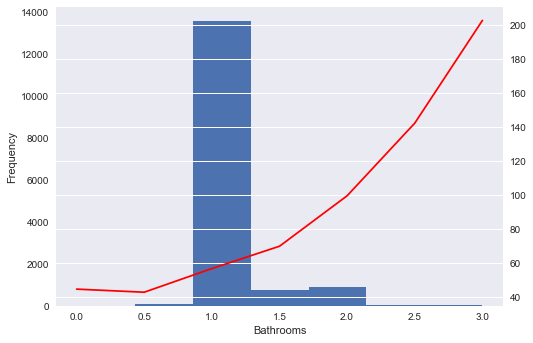

In [440]:
fig, ax = plt.subplots()
print(rooms["Bathrooms"].value_counts())
rooms["Bathrooms"].plot(ax=ax, style='b-',kind='hist', bins = 7)
avg_price_bath.plot(ax=ax, style='r-',secondary_y=True)
plt.xlabel("Number of bathrooms and average price")

#### Accomodates

In [457]:
avg_price_acc = rooms.groupby("Accomodates")['Price'].mean()
avg_price_acc

Accomodates
1.0      35.722190
2.0      48.641406
3.0      65.873927
4.0      82.789954
5.0     102.888172
6.0     123.681188
7.0     141.153846
8.0     154.072165
9.0     176.567568
10.0    207.875000
12.0    198.666667
16.0    160.000000
Name: Price, dtype: float64

2.0     8366
4.0     2190
3.0     1864
1.0     1717
6.0      505
5.0      465
8.0       97
7.0       78
9.0       37
10.0      32
12.0      12
16.0       1
Name: Accomodates, dtype: int64


Text(0.5, 0, 'Number of accomodates and average price')

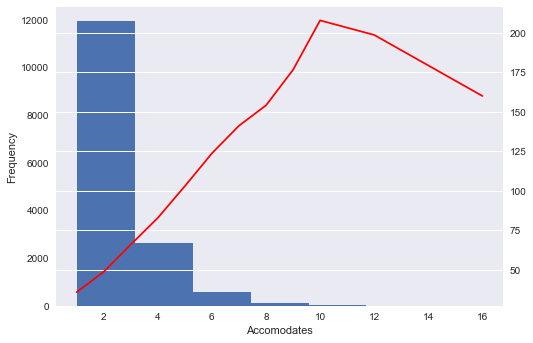

In [458]:
fig, ax = plt.subplots()
print(rooms["Accomodates"].value_counts())
rooms["Accomodates"].plot(ax=ax, style='b-',kind='hist', bins = 7)
avg_price_acc.plot(ax=ax, style='r-',secondary_y=True)
plt.xlabel("Number of accomodates and average price")

#### Guests and Beds

In [449]:
rooms["Guests Included"].value_counts()

1.0    11827
2.0     2816
4.0      401
3.0      246
5.0       33
6.0       33
8.0        8
Name: Guests Included, dtype: int64

In [450]:
rooms["Beds"].value_counts()

1.0     9833
2.0     3648
3.0      948
4.0      520
5.0      175
6.0      147
8.0       31
7.0       29
0.0       22
9.0        7
10.0       4
Name: Beds, dtype: int64

#### Number of Nights

In [456]:
rooms.groupby("Min Nights")['Price'].mean();

### Room Type

In [460]:
rooms["Room Type"].value_counts()

2.0    7763
1.0    7454
3.0     147
Name: Room Type, dtype: int64

#### One-hot Encoding

In [421]:
#Creation de Dummy values
dummies = []
dummies.append(pd.get_dummies(rooms["Room Type"])) #liste
room_dummies = pd.concat(dummies, axis=1) #tableau
rooms = pd.concat((rooms, room_dummies), axis=1) 

#### Ordinal

Test en donnant ordre aux 3

In [422]:
encoding = {"Room Type":     {"Entire home/apt": 1.0, "Private room": 2.0, "Shared room": 3.0}}

In [423]:
rooms= rooms.replace(encoding)

In [424]:
#rooms = rooms.drop(["Room Type"], axis=1)
print(rooms)

       Room Type  Accomodates  Bathrooms  Bedrooms  Beds  Guests Included  \
0            2.0          2.0        1.0       1.0   1.0              1.0   
1            1.0          2.0        1.0       2.0   2.0              2.0   
2            1.0          3.0        1.0       1.0   2.0              1.0   
3            2.0          2.0        1.0       1.0   1.0              1.0   
4            2.0          3.0        1.0       1.0   2.0              1.0   
...          ...          ...        ...       ...   ...              ...   
15687        2.0          2.0        1.5       1.0   1.0              1.0   
15688        1.0          8.0        2.0       3.0   5.0              1.0   
15689        2.0          2.0        1.5       1.0   1.0              1.0   
15690        1.0          4.0        1.0       1.0   2.0              2.0   
15691        2.0          3.0        1.0       1.0   2.0              1.0   

       Min Nights  Price  Entire home/apt  Private room  Shared room  
0   

In [425]:
rooms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15364 entries, 0 to 15691
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Room Type        15364 non-null  float64
 1   Accomodates      15364 non-null  float64
 2   Bathrooms        15364 non-null  float64
 3   Bedrooms         15364 non-null  float64
 4   Beds             15364 non-null  float64
 5   Guests Included  15364 non-null  float64
 6   Min Nights       15364 non-null  float64
 7   Price            15364 non-null  float64
 8   Entire home/apt  15364 non-null  uint8  
 9   Private room     15364 non-null  uint8  
 10  Shared room      15364 non-null  uint8  
dtypes: float64(8), uint8(3)
memory usage: 1.1 MB


### Price column

In [426]:
# 3.1 Description "price"
y_train = trainset["Price"]
y_train.describe(include="all")

count    15683.000000
mean        60.342983
std         48.829687
min          8.000000
25%         32.000000
50%         49.000000
75%         70.000000
max        900.000000
Name: Price, dtype: float64

C:\Users\julie\AppData\Local\Temp\ipykernel_39572\4218721327.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train["price_range"] = price_range


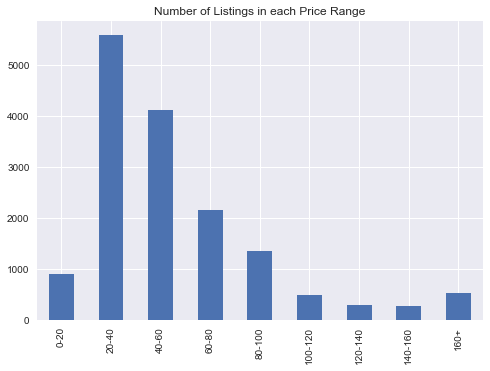

In [427]:
# 3.4 Create column price range
plt.style.use("seaborn")
price_range = pd.cut(y_train, 
                     bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, y_train.max()], 
                     labels=["0-20", "20-40", "40-60", "60-80", "80-100", "100-120", "120-140", "140-160", "160+"])
y_train["price_range"] = price_range
y_train["price_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Listings in each Price Range")
plt.show()

### Type Conversion

In [428]:
#Conversion en flottants
rooms[["Room Type", "Accomodates", "Bathrooms", "Bedrooms", "Beds", "Guests Included", "Min Nights"]] = rooms[["Room Type","Accomodates", "Bathrooms", "Bedrooms", "Beds", "Guests Included", "Min Nights"]].astype(float)

### Feature Engineering

In [429]:
rooms.columns

Index(['Room Type', 'Accomodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Guests Included', 'Min Nights', 'Price', 'Entire home/apt',
       'Private room', 'Shared room'],
      dtype='object')

In [430]:
### Nombre total de pièces
rooms["Total_rooms"] = rooms["Bathrooms"] + rooms["Bedrooms"]

In [431]:
### Nombre de lit par piece
rooms["Avg_beds"] = rooms["Beds"] / rooms["Bedrooms"]

In [432]:
rooms.head()

,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights,Price,Entire home/apt,Private room,Shared room,Total_rooms,Avg_beds
0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,26.0,0,1,0,2.0,1.0
1,1.0,2.0,1.0,2.0,2.0,2.0,7.0,41.0,1,0,0,3.0,1.0
2,1.0,3.0,1.0,1.0,2.0,1.0,1.0,50.0,1,0,0,2.0,2.0
3,2.0,2.0,1.0,1.0,1.0,1.0,2.0,50.0,0,1,0,2.0,1.0
4,2.0,3.0,1.0,1.0,2.0,1.0,6.0,55.0,0,1,0,2.0,2.0


### Correlation matrix

In [433]:
rooms_copy = rooms.copy()
corr_matrix = rooms.corr()

In [434]:
corr_matrix

,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Guests Included,Min Nights,Price,Entire home/apt,Private room,Shared room,Total_rooms,Avg_beds
Room Type,1.000000,-0.408542,-0.013913,-0.233479,-0.314701,-0.280598,-0.161467,-0.411089,-0.982361,0.927491,0.279870,-0.197333,-0.134857
Accomodates,-0.408542,1.000000,0.241605,0.617161,0.783531,0.512283,0.001662,0.498625,0.421864,-0.419959,-0.008948,0.597660,0.433527
Bathrooms,-0.013913,0.241605,1.000000,0.302276,0.249862,0.153402,-0.011985,0.247559,0.017628,-0.020821,0.016436,0.620055,0.033865
Bedrooms,-0.233479,0.617161,0.302276,1.000000,0.600193,0.376037,0.012525,0.405629,0.237640,-0.233103,-0.022837,0.935285,0.012439
Beds,-0.314701,0.783531,0.249862,0.600193,1.000000,0.447110,0.014730,0.415980,0.331791,-0.337147,0.028164,0.586760,0.697906
Guests Included,-0.280598,0.512283,0.153402,0.376037,0.447110,1.000000,0.009667,0.357435,0.284740,-0.278429,-0.031853,0.366454,0.220887
Min Nights,-0.161467,0.001662,-0.011985,0.012525,0.014730,0.009667,1.000000,0.017913,0.163336,-0.159189,-0.020975,0.005859,0.008421
Price,-0.411089,0.498625,0.247559,0.405629,0.415980,0.357435,0.017913,1.000000,0.416526,-0.406649,-0.049907,0.425767,0.143329
Entire home/apt,-0.982361,0.421864,0.017628,0.237640,0.331791,0.284740,0.163336,0.416526,1.000000,-0.981038,-0.095411,0.202137,0.159476
Private room,0.927491,-0.419959,-0.020821,-0.233103,-0.337147,-0.278429,-0.159189,-0.406649,-0.981038,1.000000,-0.099328,-0.199588,-0.178599


In [435]:
corr_matrix["Price"].sort_values(ascending=False)

Price              1.000000
Accomodates        0.498625
Total_rooms        0.425767
Entire home/apt    0.416526
Beds               0.415980
Bedrooms           0.405629
Guests Included    0.357435
Bathrooms          0.247559
Avg_beds           0.143329
Min Nights         0.017913
Shared room       -0.049907
Private room      -0.406649
Room Type         -0.411089
Name: Price, dtype: float64

### Feature Selection

In [436]:
#Selected features
selected = ["Accomodates", "Entire home/apt", "Total Rooms"]
X_train = rooms[selected]

### Learning Algorithm